<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/07_12_Crime_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. IMPORTS**

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [232]:
# Diretamente do GitHub (dataset 2014):
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-10mil.csv'
data = pd.read_csv(url)

In [233]:
# (dataset 2014 antigo):
# url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-100mil.csv'
# data = pd.read_csv(url)

In [234]:
# data.to_csv('2014-1-100mil.csv', index= True)

Limpeza do dataset:

In [235]:
print(data.isnull().sum())
print(data)

Unnamed: 0                   0
NUM_BO                       0
ANO_BO                       0
ID_DELEGACIA                 0
NOME_DEPARTAMENTO            0
NOME_SECCIONAL               0
DELEGACIA                    0
NOME_DEPARTAMENTO_CIRC       0
NOME_SECCIONAL_CIRC          0
NOME_DELEGACIA_CIRC          0
ANO                          0
MES                          0
DATA_OCORRENCIA_BO          87
HORA_OCORRENCIA_BO        1040
FLAG_STATUS                  0
RUBRICA                      0
DESDOBRAMENTO             9351
CONDUTA                   4835
LATITUDE                  1593
LONGITUDE                 1593
CIDADE                       0
LOGRADOURO                 429
NUMERO_LOGRADOURO         2467
FLAG_STATUS.1                0
DESCR_TIPO_PESSOA            0
CONT_PESSOA                  0
SEXO_PESSOA                  0
IDADE_PESSOA              1902
COR                       2372
DESCR_PROFISSAO           3002
DESCR_GRAU_INSTRUCAO      2832
dtype: int64
      Unnamed: 0  NUM_BO  

In [236]:
data.shape

(10000, 31)

In [237]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   NUM_BO                  10000 non-null  int64  
 2   ANO_BO                  10000 non-null  int64  
 3   ID_DELEGACIA            10000 non-null  int64  
 4   NOME_DEPARTAMENTO       10000 non-null  object 
 5   NOME_SECCIONAL          10000 non-null  object 
 6   DELEGACIA               10000 non-null  object 
 7   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 8   NOME_SECCIONAL_CIRC     10000 non-null  object 
 9   NOME_DELEGACIA_CIRC     10000 non-null  object 
 10  ANO                     10000 non-null  int64  
 11  MES                     10000 non-null  int64  
 12  DATA_OCORRENCIA_BO      9913 non-null   object 
 13  HORA_OCORRENCIA_BO      8960 non-null   object 
 14  FLAG_STATUS             10000 non-null 

In [286]:
data = data.drop(columns=['ID_DELEGACIA','NOME_DEPARTAMENTO', 'NOME_SECCIONAL','DELEGACIA','NOME_DEPARTAMENTO_CIRC','NOME_SECCIONAL_CIRC','FLAG_STATUS','DESDOBRAMENTO','NUMERO_LOGRADOURO','FLAG_STATUS.1'])
data.to_csv('data_semDesdob.csv', index= False)
data.head()

,Unnamed: 0,NUM_BO,ANO_BO,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,0,1,2014,83 D.P. PARQUE BRISTOL,2014,1,02/01/2014,06:30,Roubo (art. 157),VEICULO,-2.365.760.046,-4.661.717.673,S.PAULO,AV MIGUEL STEFANO,Autor,2,M,NaN,Preta,NaN,NaN
1,1,1,2014,100 D.P. JDIM HERCULANO,2014,1,02/01/2014,NaN,Roubo (art. 157),TRANSEUNTE,-2.368.989.209,-4.677.386.022,S.PAULO,EST DO M BOI MIRIM,Vitima,1,F,39.0,Branca,NaN,NaN
2,2,1,2014,12 D.P. PARI,2014,2,22/02/2014,NaN,Furto (art. 155),OUTROS,-2.352.095.371,-466.253.548,S.PAULO,PONTE CRUZEIRO DO SUL,Vitima,1,M,52.0,Parda,AJUDANTE GERAL,1 Grau completo
3,3,1,2014,06 D.P. SANTO ANDRE,2014,1,01/01/2014,01:00,Furto (art. 155),VEICULO,-2.369.004.592,-4.651.597.554,S.ANDRE,AV AUREA,Curador,14,F,60.0,NaN,APOSENTADO(A),NaN
4,4,1,2014,06 D.P. SANTO ANDRE,2014,1,01/01/2014,01:00,Furto (art. 155),VEICULO,-2.369.004.592,-4.651.597.554,S.ANDRE,AV AUREA,Indiciado,3,M,26.0,Parda,DESEMPREGADO(A),2 Grau completo


In [239]:
data['CONDUTA'].value_counts()

VEICULO                         1386
TRANSEUNTE                      1369
OUTROS                           681
RESIDENCIA                       422
INTERIOR DE VEICULO              354
ESTABELECIMENTO COMERCIAL        326
CARGA                            273
INTERIOR ESTABELECIMENTO         112
ESTABELECIMENTO BANCARIO          75
ESTABELECIMENTO-OUTROS            62
INTERIOR TRANSPORTE COLETIVO      46
ESTABELECIMENTO ENSINO            37
COLETIVO                          13
CONDOMINIO RESIDENCIAL             7
CONDOMINIO COMERCIAL               2
Name: CONDUTA, dtype: int64

In [240]:
data['CONDUTA'].fillna('VEICULO', inplace=True)

In [241]:
data['CONDUTA'].value_counts()

VEICULO                         6221
TRANSEUNTE                      1369
OUTROS                           681
RESIDENCIA                       422
INTERIOR DE VEICULO              354
ESTABELECIMENTO COMERCIAL        326
CARGA                            273
INTERIOR ESTABELECIMENTO         112
ESTABELECIMENTO BANCARIO          75
ESTABELECIMENTO-OUTROS            62
INTERIOR TRANSPORTE COLETIVO      46
ESTABELECIMENTO ENSINO            37
COLETIVO                          13
CONDOMINIO RESIDENCIAL             7
CONDOMINIO COMERCIAL               2
Name: CONDUTA, dtype: int64

In [242]:
data['LATITUDE'].value_counts()

-2.371.286.115    48
-2.364.027.263    23
-2.352.519.435    23
-2.355.850.851    22
-2.347.103.556    22
                  ..
-2.362.600.459     1
-2.366.441.651     1
-2.378.440.456     1
-2.369.057.317     1
-2.359.093.471     1
Name: LATITUDE, Length: 3439, dtype: int64

In [243]:
data['LATITUDE'].fillna('-23.71286115', inplace=True)

In [244]:
data['LATITUDE'].replace('Informacao restrita (art. 31 da LAI)', '-23.71286115')

0       -2.365.760.046
1       -2.368.989.209
2       -2.352.095.371
3       -2.369.004.592
4       -2.369.004.592
             ...      
9995    -2.359.282.471
9996    -2.368.735.677
9997      -237.704.097
9998    -2.358.106.758
9999      -236.138.048
Name: LATITUDE, Length: 10000, dtype: object

In [245]:
data['LATITUDE'].replace('NULL', '-23.71286115')

0       -2.365.760.046
1       -2.368.989.209
2       -2.352.095.371
3       -2.369.004.592
4       -2.369.004.592
             ...      
9995    -2.359.282.471
9996    -2.368.735.677
9997      -237.704.097
9998    -2.358.106.758
9999      -236.138.048
Name: LATITUDE, Length: 10000, dtype: object

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   NUM_BO                10000 non-null  int64  
 2   ANO_BO                10000 non-null  int64  
 3   NOME_DELEGACIA_CIRC   10000 non-null  object 
 4   ANO                   10000 non-null  int64  
 5   MES                   10000 non-null  int64  
 6   DATA_OCORRENCIA_BO    9913 non-null   object 
 7   HORA_OCORRENCIA_BO    8960 non-null   object 
 8   RUBRICA               10000 non-null  object 
 9   CONDUTA               10000 non-null  object 
 10  LATITUDE              10000 non-null  object 
 11  LONGITUDE             8407 non-null   object 
 12  CIDADE                10000 non-null  object 
 13  LOGRADOURO            9571 non-null   object 
 14  DESCR_TIPO_PESSOA     10000 non-null  object 
 15  CONT_PESSOA         

In [247]:
data['LONGITUDE'].value_counts()

-4.678.186.771    48
-4.639.605.905    23
-4.681.568.811    23
-4.672.128.418    22
-4.661.519.738    22
                  ..
-4.675.092.639     1
-4.644.299.261     1
-4.636.868.651     1
-4.670.191.866     1
-4.685.348.802     1
Name: LONGITUDE, Length: 3439, dtype: int64

In [248]:
data['LONGITUDE'].fillna('-46.78186771', inplace=True)

In [249]:
data['LONGITUDE'].replace('Informacao restrita (art. 31 da LAI)', '-46.78186771')

0       -4.661.717.673
1       -4.677.386.022
2         -466.253.548
3       -4.651.597.554
4       -4.651.597.554
             ...      
9995    -4.680.662.548
9996    -4.666.987.176
9997    -4.672.372.479
9998    -4.675.421.897
9999    -4.653.028.157
Name: LONGITUDE, Length: 10000, dtype: object

In [250]:
data['LONGITUDE'].replace('NULL', '-46.78186771')

0       -4.661.717.673
1       -4.677.386.022
2         -466.253.548
3       -4.651.597.554
4       -4.651.597.554
             ...      
9995    -4.680.662.548
9996    -4.666.987.176
9997    -4.672.372.479
9998    -4.675.421.897
9999    -4.653.028.157
Name: LONGITUDE, Length: 10000, dtype: object

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   NUM_BO                10000 non-null  int64  
 2   ANO_BO                10000 non-null  int64  
 3   NOME_DELEGACIA_CIRC   10000 non-null  object 
 4   ANO                   10000 non-null  int64  
 5   MES                   10000 non-null  int64  
 6   DATA_OCORRENCIA_BO    9913 non-null   object 
 7   HORA_OCORRENCIA_BO    8960 non-null   object 
 8   RUBRICA               10000 non-null  object 
 9   CONDUTA               10000 non-null  object 
 10  LATITUDE              10000 non-null  object 
 11  LONGITUDE             10000 non-null  object 
 12  CIDADE                10000 non-null  object 
 13  LOGRADOURO            9571 non-null   object 
 14  DESCR_TIPO_PESSOA     10000 non-null  object 
 15  CONT_PESSOA         

In [252]:
data['DATA_OCORRENCIA_BO'].value_counts()

01/01/2014    2556
02/01/2014    1443
03/01/2014     911
06/01/2014     550
04/01/2014     415
              ... 
23/05/2014       1
15/02/2014       1
04/05/2014       1
22/03/2014       1
03/05/2014       1
Name: DATA_OCORRENCIA_BO, Length: 155, dtype: int64

In [253]:
data['DATA_OCORRENCIA_BO'].fillna('01/01/2014', inplace=True)

In [254]:
data['HORA_OCORRENCIA_BO'].value_counts()

12:00    239
15:00    218
16:00    207
14:00    204
01:00    201
        ... 
18:29      1
15:06      1
08:08      1
15:33      1
19:37      1
Name: HORA_OCORRENCIA_BO, Length: 484, dtype: int64

In [255]:
data['HORA_OCORRENCIA_BO'].fillna('12:00', inplace=True)

In [256]:
# data['somente Horas'] = pd.to_datetime(data['HORA_OCORRENCIA_BO'], format= '%H:%M.%f') \
                        # .apply(lambda x: x.strftime('%H:%M'))

In [257]:
data['LOGRADOURO'].value_counts()

AV SAPOPEMBA                65
EST DO M BOI MIRIM          54
AV DO ESTADO                39
R APA                       35
AV CELSO GARCIA             34
                            ..
R JOSE TIBURCIO DA CUNHA     1
R GALENO DE CASTRO           1
VIELA SANTA FRANCISCA        1
R ALVARES CABRAL             1
R ESTAMPA ESPORTIVA          1
Name: LOGRADOURO, Length: 3186, dtype: int64

In [258]:
data['LOGRADOURO'].fillna('AV SAPOPEMBA', inplace=True)

In [259]:
data['COR'].value_counts()

Branca     4166
Parda      2517
Preta       575
Outros      334
Amarela      36
Name: COR, dtype: int64

In [260]:
data['COR'].fillna('Branca', inplace=True)

In [261]:
data['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo        2780
1 Grau completo        1882
Superior completo      1310
1 Grau incompleto       574
Superior incompleto     321
2 Grau incompleto       227
Analfabeto               74
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [262]:
data['DESCR_GRAU_INSTRUCAO'].fillna('2 Grau completo', inplace=True)

In [263]:
data['IDADE_PESSOA'].value_counts()

30.0    269
26.0    260
33.0    256
28.0    245
38.0    241
       ... 
89.0      1
81.0      1
90.0      1
88.0      1
87.0      1
Name: IDADE_PESSOA, Length: 92, dtype: int64

In [264]:
data['IDADE_PESSOA'].fillna('30', inplace=True)

In [265]:
data['DESCR_PROFISSAO'].value_counts()

POLICIAL MILITAR    827
POLICIAL CIVIL      721
ESTUDANTE           308
MOTORISTA           300
DESEMPREGADO        281
                   ... 
MODELISTA             1
JUIZ DE DIREITO       1
AZULEJISTA            1
ASSESSORISTA          1
AGENTE DE SAUDE       1
Name: DESCR_PROFISSAO, Length: 417, dtype: int64

In [266]:
data['DESCR_PROFISSAO'].fillna('POLICIAL MILITAR', inplace=True)

In [267]:
print(data.isnull().any())
print()

Unnamed: 0              False
NUM_BO                  False
ANO_BO                  False
NOME_DELEGACIA_CIRC     False
ANO                     False
MES                     False
DATA_OCORRENCIA_BO      False
HORA_OCORRENCIA_BO      False
RUBRICA                 False
CONDUTA                 False
LATITUDE                False
LONGITUDE               False
CIDADE                  False
LOGRADOURO              False
DESCR_TIPO_PESSOA       False
CONT_PESSOA             False
SEXO_PESSOA             False
IDADE_PESSOA            False
COR                     False
DESCR_PROFISSAO         False
DESCR_GRAU_INSTRUCAO    False
dtype: bool



In [268]:
data.describe()

,Unnamed: 0,NUM_BO,ANO_BO,ANO,MES,CONT_PESSOA
count,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,4999.50000,24.377100,2014.011400,2014.0,1.362000,2.625500
std,2886.89568,16.054192,0.112567,0.0,0.898909,1.934276
min,0.00000,1.000000,2014.000000,2014.0,1.000000,1.000000
25%,2499.75000,11.000000,2014.000000,2014.0,1.000000,1.000000
50%,4999.50000,21.000000,2014.000000,2014.0,1.000000,2.000000
75%,7499.25000,37.000000,2014.000000,2014.0,1.000000,3.000000
max,9999.00000,63.000000,2017.000000,2014.0,6.000000,17.000000


In [269]:
data['MES'].value_counts()

1    8126
2     904
3     481
4     278
5     135
6      76
Name: MES, dtype: int64

In [270]:
mes = data["MES"]
delito = data["RUBRICA"]


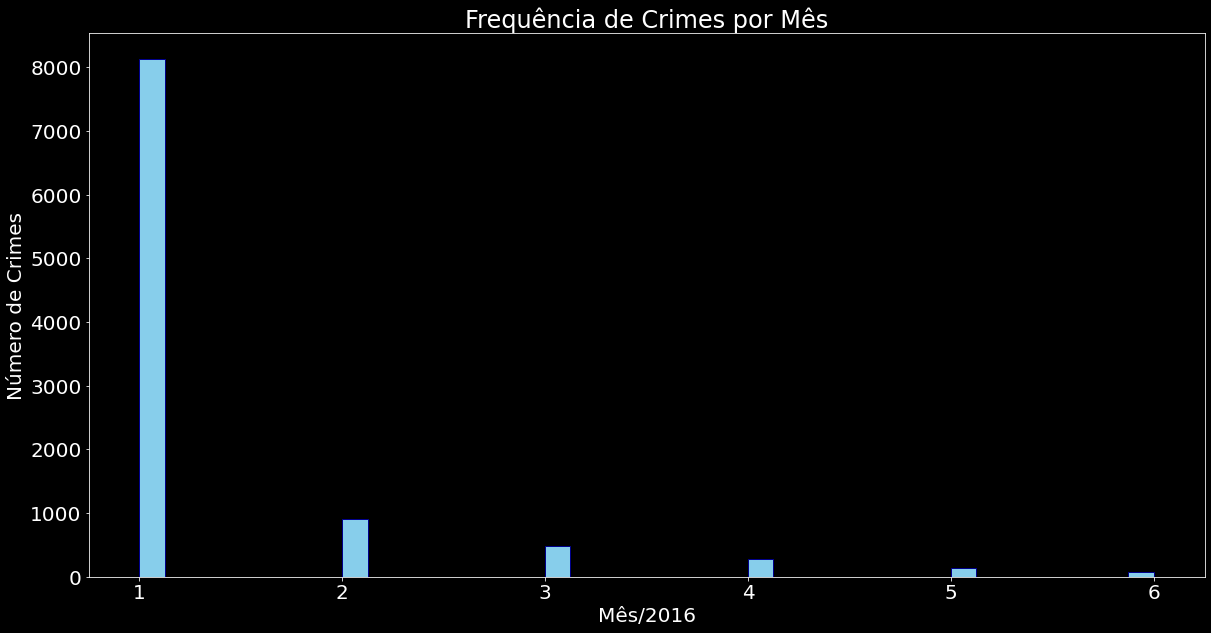

In [271]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.hist(mes, bins=40, color = "skyblue", ec="darkblue")
plt.title('Frequência de Crimes por Mês')
plt.ylabel('Número de Crimes')
plt.xlabel('Mês/2016')
plt.rcParams.update({'font.size': 20})
plt.show()

In [272]:
data['RUBRICA'].value_counts()

Roubo (art. 157)                                                     3494
Lesao corporal (art. 129)                                            1310
Drogas sem autorizacao ou em desacordo (Art.33 caput)                1175
Furto (art. 155)                                                     1003
Furto qualificado (art. 155 4o.)                                      607
Lesao corporal culposa na direcao de veiculo automotor (Art. 303)     596
A.I.-Drogas sem autorizacao ou em desacordo (Art.33 caput)            519
Lesao corporal (art 129_9)                                            477
Homicidio simples (art. 121)                                          271
A.I.-Roubo (art. 157)                                                 136
Estupro de vulneravel (art.217-A)                                      98
Homicidio qualificado (art. 121 2o.)                                   96
Estupro (art.213)                                                      50
Lesao corporal culposa (art. 129. 6o.)

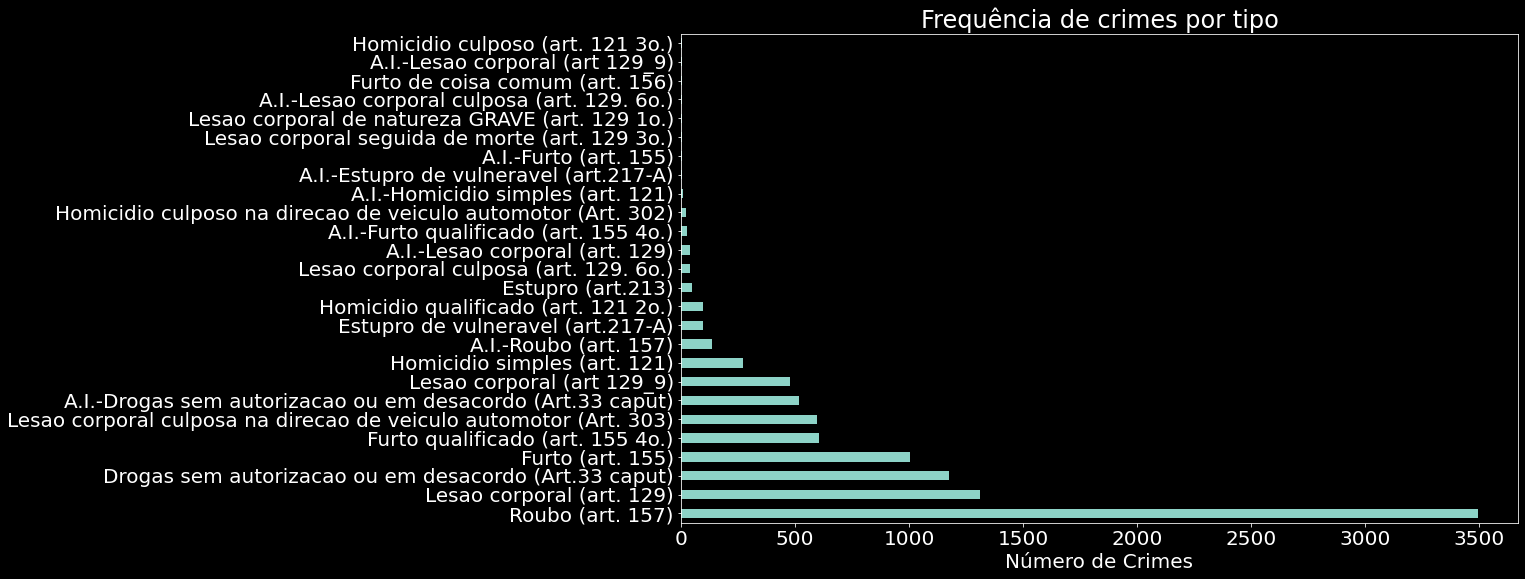

In [273]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.xlabel('Número de Crimes')
data['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.show()


In [274]:
# novas_colunas = pd.get_dummies(data['RUBRICA']) 
# data = pd.concat([data,novas_colunas], axis=1) 
# data.head(2)

In [275]:
import os
import folium
import pandas as pd
print(folium.__version__)

0.8.3


In [276]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-jzw5fy3f
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-jzw5fy3f
  Created wheel for folium: filename=folium-0.0.0-py2.py3-none-any.whl size=94062 sha256=5ed359c3445a9d0d493a1ee74b3ba547bdab79ca36ea1b4152f9d42a23cdc145
  Stored in directory: /tmp/pip-ephem-wheel-cache-4gqs_r9_/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [277]:
# !pip install folium

In [278]:
# from folium import plugins

# mapa = folium.Map(location=[-23.71286115, -46.78186771],tiles='Stamen Toner',zoom_start=12)
# coordenadas = []

# lat = data['LATITUDE'][:1000].values
# long = data['LONGITUDE'][:1000].values

# for la,lo in zip(lat,long):
#   coordenadas.append([la,lo])

# mapa.add_child(plugins.HeatMap(coordenadas))
# mapa

#**2. SEPARAR A VARIÁVEL ALVO**

In [288]:
x = data[['CONDUTA','HORA_OCORRENCIA_BO', 'LOGRADOURO', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR', 'DESCR_PROFISSAO']].copy()
y = data[['RUBRICA']].copy()

#**3. DIVIDIR TESTE E TREINAMENTO**

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=500)

#**4. CRIAR MODELO DE ML**

In [291]:
tipos_crimes_classifier = DecisionTreeClassifier(max_leaf_nodes=10000, random_state=1)
tipos_crimes_classifier.fit(x_train, y_train)

ValueError: ignored

In [ ]:
print(tipos_crimes_classifier)

#**5. FAZER PREDIÇÃO**

In [ ]:
predictions = tipos_crimes_classifier.predict(x_test)

#**6. TESTAR ACURÁCIA**

In [ ]:
accuracy_score(y_true=y_test, y_pred=predictions)